# ARTIFICIAL NEURAL NETWORKS

# Data Exploration and Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('Alphabets_data.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [4]:
# Check for missing values
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [5]:
# Encode categorical variables if necessary
label_encoder = LabelEncoder()
data['letter'] = label_encoder.fit_transform(data['letter'])

In [6]:
# Separate features and target variable
X = data.drop(columns=['letter'])
y = data['letter']

In [7]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

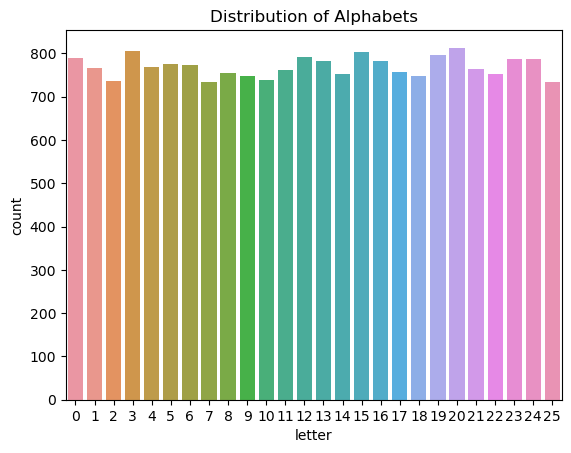

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of target variable
sns.countplot(x=y)
plt.title('Distribution of Alphabets')
plt.show()

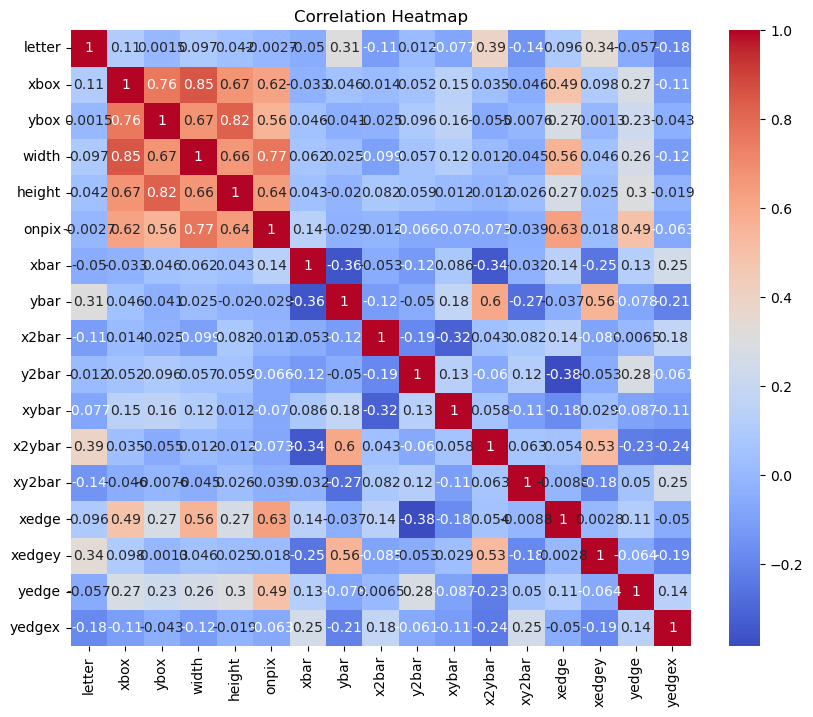

In [9]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Implementation

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
!pip install tensorflow

     -------------------------------------- 385.0/385.0 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 71.9/71.9 kB 493.5 kB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 4.4/4.4 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 270.1/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [12]:
!pip install keras-tuner

     -------------------------------------- 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

C:\Users\Sony\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2900 - loss: 2.6047 - val_accuracy: 0.6756 - val_loss: 1.1880
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7100 - loss: 1.0579 - val_accuracy: 0.7591 - val_loss: 0.8627
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7733 - loss: 0.8012 - val_accuracy: 0.7981 - val_loss: 0.7183
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.6653 - val_accuracy: 0.8163 - val_loss: 0.6284
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - loss: 0.5831 - val_accuracy: 0.8400 - val_loss: 0.5603
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8516 - loss: 0.5105 - val_accuracy: 0.8422 - val_loss: 0.5175
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.4714 - val_accuracy: 0.8594 - val_loss: 0.4753
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.4216 - val_accuracy: 0.

# Hyperparameter Tuning

In [17]:
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

C:\Users\Sony\AppData\Local\Temp\ipykernel_9428\1733747288.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [18]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 5 Complete [00h 02m 57s]
val_accuracy: 0.949791669845581

Best val_accuracy So Far: 0.949791669845581
Total elapsed time: 00h 14m 32s


In [19]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 80, Best units2: 48, Best learning_rate: 0.001


In [20]:
# Build the best model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

In [21]:
# Train the model
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3237 - loss: 2.4742 - val_accuracy: 0.6994 - val_loss: 1.0401
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7379 - loss: 0.9210 - val_accuracy: 0.7759 - val_loss: 0.7607
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.6853 - val_accuracy: 0.8209 - val_loss: 0.6229
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8348 - loss: 0.5693 - val_accuracy: 0.8384 - val_loss: 0.5495
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.4860 - val_accuracy: 0.8591 - val_loss: 0.4863
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8700 - loss: 0.4352 - val_accuracy: 0.8725 - val_loss: 0.4352
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8787 - loss: 0.3999 - val_accuracy: 0.8866 - val_loss: 0.3914
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8957 - loss: 0.3534 - val_accuracy: 0.

# Evaluation

In [22]:
# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9499 - loss: 0.1727
Test Accuracy: 0.9502500295639038
